<a href="https://colab.research.google.com/github/rkurFIUNA/1ParcialIA/blob/main/PythonIA_Cap6_PipelineyCalificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**CAPITULO 6**

**Calificacion de modelo y  buena practica para calibracion de high parameter**



#**6.1 Mayor eficiencia de flujo de trabajo por medio de Pipeline**

 En este capitulo se mostrara una clase llamada **Pipeline** de la libreria **scikit-learn**. Utilizando esta clase, se hace posible aprender un modelo que contenga paso de transformacion de una cantidad conveniente(?) y predecir nuevos datos utilizando el mismo.

  Utilizamos el dataset *Beast Cancer Wiscoinsin*. En este dataset, contiene 569 muestras de un tumor maligno y benigno. En las primeras dos columnas, contiene el ID y el resultado que lo pertenece. El resultado **M** significa Maligno, y **B** Benigno. Desde la columna 3 hasta la columna 32 contiene numeros caracteristicos reales que se obtuvo de la imagen digital. Se utiliza para predecir si es Maligno o Benigno.

---

**1.** Lectura de Dataset

In [11]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                'breast-cancer-wisconsin/wdbc.data',
                header=None)


**2.** Asignar los 30 caracteristicas en un objeto *Numpy* X, transformar M y B en numero por medio de **LabelEncoder**

In [12]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_
le.transform(['M','B'])

array([1, 0])

**3.**Dividimos el dataset en 8:2 para prueba y entrenamiento

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 1,stratify=y)

#**6.1.2. Conexion de Conversor y Predictor por medio de Pipeline.**
v
 Para obtener un resultado optimo, se debe ajustar los valores caracteristicos. Por lo tanto se estandarizara el dataset *Breast Cancer Winsconsin*, para que pueda entrar en distribuidor lineal de regresion logistica. Ademas, utilizando PCA (Principal Component Analisis) queremos comprimir informacion de 30 dimensiones a 2 dimension. Para no realizar las transformaciones de Train y Test de manera separada, vamos a conectar *StandardScaler, PCA, LogisticRegression*  en un pipeline.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# 連結する処理としてスケーリング、主成分分析、ロジスティック回帰を指定
pipe_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                          LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


 El objeto *Pipeline* pide una lista tuple. Los primeros valores de los respectivos tuples, es una cadena cualquiera para la identificacion, que se utiliza para acceder a los respectivos elementos.

##**6.2 Calificacion del modelo utilizando "k-fold cross-validation"**

 Uno de los pasos importantes para crear un modelo de aprendizaje, es calificar el modelo utilizando una informacion "nueva" para el modelo. Por ejemplo, se realiza el entrenamiento por medio de *training data* . Tal como se vio el capitulo **3** se vio "evitar el sobreaprendizaje por medio de normalizacion", si el modelo es muy simple con respecto a training data, se llega a "falta de aprendizaje" en cambio si es muy complicado se llega a "sobreaprendizaje". Para llegar a un bias y varianza equilibrado, se requiere una calificacion detallada.

 Veremos dos metodos para la calificacion: "holdout method" y "k-fold cross-validation" lo cual sirve para determinar la capacidad del modelo de manera puntual.



In [15]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score)) 

print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores),np.std(scores)))


Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956
CV accuracy: 0.950 +/- 0.014


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 Primeramente, se inicializa *StratifiedKfold* que ofrece *sklearn.model_selection* por medio del class label *y_train* .
 
 La cantidad de division se asigna mediante el parametro *n_folds*
 El iterador *kfold* se utiliza para procesar los k subsets, mediante bucle for.
 
 Utilizando el index que es devuelto por train: 
 
 *for k, (train,test) in enumerate(kfold)*

va aprendiendo mediante el sistema pipeline preparado previamente.

Seguidamente utilizamos test para calcular el porcentaje de acierto. Luego se guarda en lista scores.


In [16]:
from sklearn.model_selection import cross_val_score
#caulcula el porcentaje de acierto por metodo cross_val_score
#estimator = objeto clasificador
#X = training data
#y = valor de predicion
#cv = cantidad de divicion
#n_jobs = Cantidad de CPU

scores = cross_val_score(estimator=pipe_lr,X = X_train,y=y_train,cv=10,n_jobs=-1)
print('CV accuracy scores : %s' %scores)
print('CV accuracy:%.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy scores : [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy:0.950 +/- 0.014


##**6.3 CURVA DE APRENDIZAJE Y CURVA DE VERIFICACION**

 Cuando el modelo es muy complicado con respecto al Training DataSets, es decir, si el grado de libertad del modelo es muy alto o existe demasciados parametros, el modelo tiende a sobre-aprender, y no se generaliza para datos desconocidos.
 Si se junta la muestras de entrenamiento, puede funcionar para evitar esto. Sin embargo, los costos de juntar datos es muy alto, y muchas veces no es factible. 


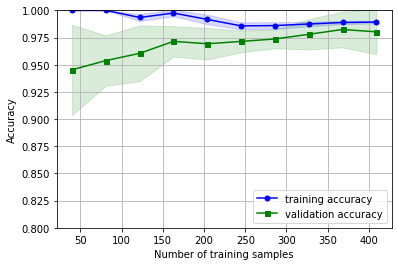

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),
                       LogisticRegression(penalty='l2', random_state=1))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv = 10, n_jobs=1)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std,train_mean-train_std, alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std,test_mean-test_std, alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()

 Para controlar el valor absoluto o relativo de training samples que se utiliza al generar la curva de aprendizaje, se utiliza la variable **train_sizes** de **learning_curve**. Aca, al configurar *train_sizes=np.linspace(0.1,1.0,10)* esta utilizando los 10 valores relativos de igual distancias coincidentes al tamano de training data sets. En default, learning_curve utiliza el metodo k-fold cross-validation. **k=10** se configura utilizando el variable **cv**. Finalmente devuelve los scores de cross validation de training y test, para distintos tamanos de training data sets. 

 En este grafico se observa, que los resultados son muy buenos. Sin embargo, entre las curvas se observa una distancia muy pequena por lo que hay una cantidad pequena de sobre-aprendizaje.

---

##**Conocer el sobre aprendizaje y falta de aprendizaje utilizando curva de verificacion.**

La curva de verificacion sirve, mas que determinar la falta o sobre-aprendizaje, para mejorar la capacidad del modelo. Aunque la curva de verificacion, tiene relacion con curva de aprendizaje, en vez de describir la probabilidad de acierto de training y test como una funcion de tamano de muestras, cambia el valor de los parametros del modelo en vez de tamano de muestras.





/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


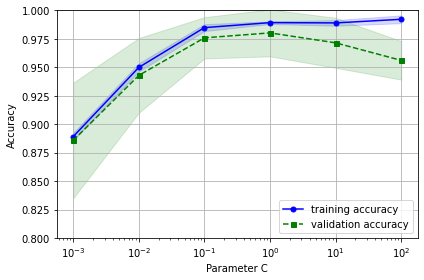

In [19]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                            X=X_train,
                                            y=y_train,
                                            param_name='logisticregression__C',
                                            param_range=param_range,
                                            cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5,
        label='training accuracy')
plt.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std, alpha=0.15,
                color='blue')
plt.plot(param_range, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

 Tal como el metodo *learning_curve*, el metodo *validation_curve* en default utiliza *k-fold cross-validation* y califica la especificacion del modelo si es que se utiliza algoritmo de clasificacion. Para este caso, utiliza el parametro **C** 

 ---
$C = \frac{1}{\lambda}$  

*pag 65*

---

**param name** se utiliza para entrar en *Logistic Regression* del pipeline (*pipe_lr*)

Para este caso se observa que **C = 0.1* llega al mejor resultado.


##**Afinacion de modelo de aprendizaje por Gread Research**

 En Machine learning existe dos tipos de parametros. Uno de ellos es el parametro que se aprende por training data tal como el peso de regresion logistica, y por otro, unos parametros que se optimiza de forma particular. Este se conoce como *hyperparametro*. Por ejemplo, el parametro de normalizacion de regresion logistica o parametro de afinacion de profundidad de arbol de desicion.

 #**Afinacion de hiperparametro utilizando grid research.**

 

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['lineal']},
              {'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring = 'accuracy',
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train,y_train)

print(gs.best_score_)

print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


 Este codigo, inicializa el objeto **GridSearchCV** de la libreria **model_selection**, luego afina y entrena el **Support Vector Machine(SVM)** 

 ---

  *Support vector machine : Ampliacion de Perceptron. (Pag.66)


  ---

 Para seleccionar los parametro de afinacion, se setea un diccionario en el variable **param_grid** de **GridSearchCV**. En SVM Lineal, solamente se califica **C**. En *SVM Kernel RBF* se califica el parametro **C** y **Gamma**. 

In [28]:
clf = gs.best_estimator_
clf.fit(X_train,y_train)
print('Test accuracy: %.3f' % clf.score(X_test,y_test))

Test accuracy: 0.974
